In [113]:
import pandas as pd
import numpy as np

In [114]:
albedo_map = pd.read_csv('Dataset/Moon/Albedo_Map.csv')
fe = pd.read_csv('Dataset/Moon/LPFe_Map.csv')
k = pd.read_csv('Dataset/Moon/LPK_Map.csv')
th = pd.read_csv('Dataset/Moon/LPTh_Map.csv')
ti = pd.read_csv('Dataset/Moon/LPTi_Map.csv')

In [115]:
%matplotlib inline 
from matplotlib import pyplot as plt

Interpolation is done to reduce noise in images

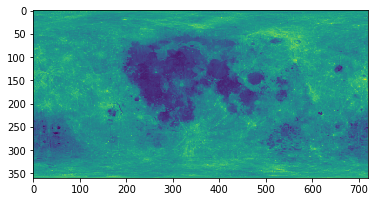

In [14]:
albedo_map_arr = albedo_map.to_numpy()
plt.imshow(albedo_map_arr, interpolation='none')
plt.show()

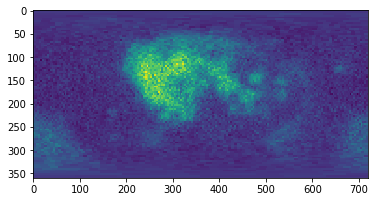

In [15]:
fe_arr = fe.to_numpy()
plt.imshow(fe_arr, interpolation='nearest')
plt.show()

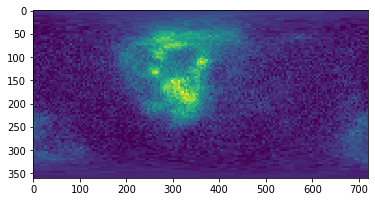

In [16]:
k_arr = k.to_numpy()
plt.imshow(k_arr, interpolation='nearest')
plt.show()

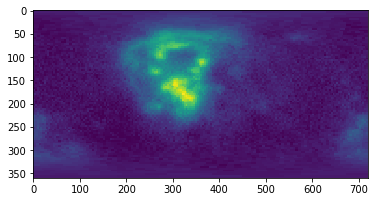

In [17]:
th_arr = th.to_numpy()
plt.imshow(th_arr, interpolation='nearest')
plt.show()

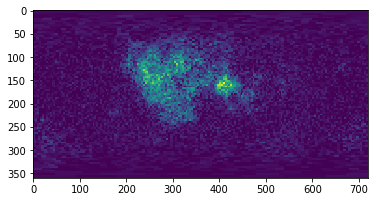

In [18]:
ti_arr = ti.to_numpy()
plt.imshow(ti_arr, interpolation='nearest')
plt.show()

### Fe

In [19]:
x_train = fe.iloc[:,:int(fe.shape[1]/2)]
x_test = fe.iloc[:,int(fe.shape[1]/2):]
y_train = albedo_map.iloc[:,:int(albedo_map.shape[1]/2)]
y_test = albedo_map.iloc[:,int(albedo_map.shape[1]/2):]

In [20]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.0022739482971186227

#### Output predicted comparisions

In [22]:
column = []
for i in range(361,721):
    column.append(i)

In [23]:
y_pred = pd.DataFrame(y_pred, columns=column)
frames = [y_train, y_pred]
y_output = pd.concat(frames, axis = 1)

Text(0.5, 1.0, 'Output Image with predicted right half')

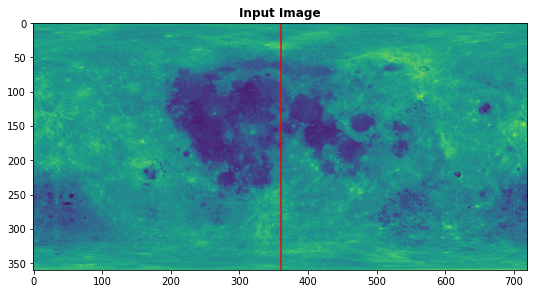

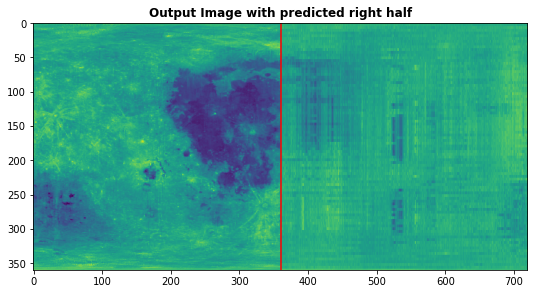

In [24]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(albedo_map_arr)
plt.axvline(x=360, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axvline(x=360, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted right half', fontweight="bold")

Histogram

In [25]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


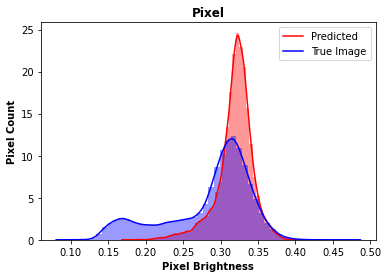

In [26]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

### K

In [27]:
x_train = k.iloc[:,:int(k.shape[1]/2)]
x_test = k.iloc[:,int(k.shape[1]/2):]
y_train = albedo_map.iloc[:,:int(albedo_map.shape[1]/2)]
y_test = albedo_map.iloc[:,int(albedo_map.shape[1]/2):]

In [28]:
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.002342920007568432

#### Output predicted comparisions

In [30]:
column = []
for i in range(361,721):
    column.append(i)

In [31]:
y_pred = pd.DataFrame(y_pred, columns=column)
frames = [y_train, y_pred]
y_output = pd.concat(frames, axis = 1)

Text(0.5, 1.0, 'Output Image with predicted right half')

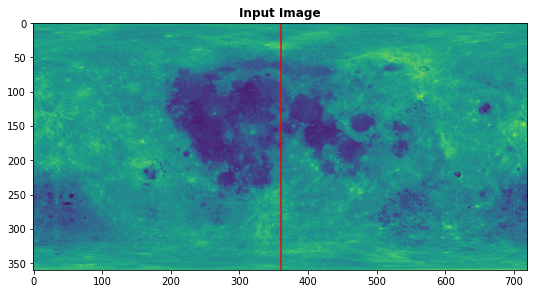

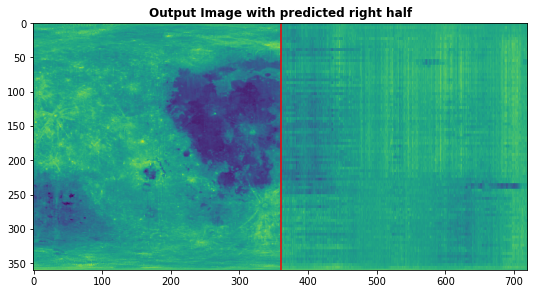

In [32]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(albedo_map_arr)
plt.axvline(x=360, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axvline(x=360, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted right half', fontweight="bold")

Histogram

In [33]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


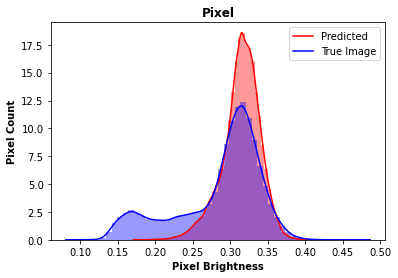

In [34]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

### Th

In [35]:
x_train = th.iloc[:,:int(th.shape[1]/2)]
x_test = th.iloc[:,int(th.shape[1]/2):]
y_train = albedo_map.iloc[:,:int(albedo_map.shape[1]/2)]
y_test = albedo_map.iloc[:,int(albedo_map.shape[1]/2):]

In [36]:
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.002606791837194686

#### Output predicted comparisions

In [38]:
column = []
for i in range(361,721):
    column.append(i)

In [39]:
y_pred = pd.DataFrame(y_pred, columns=column)
frames = [y_train, y_pred]
y_output = pd.concat(frames, axis = 1)

Text(0.5, 1.0, 'Output Image with predicted right half')

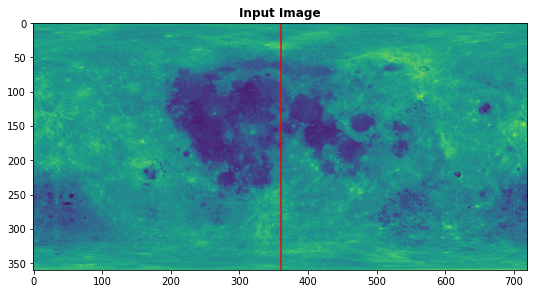

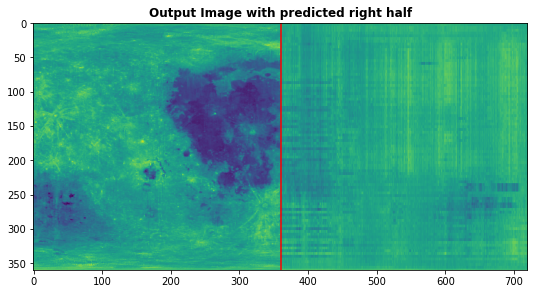

In [40]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(albedo_map_arr)
plt.axvline(x=360, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axvline(x=360, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted right half', fontweight="bold")

Histogram

In [41]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


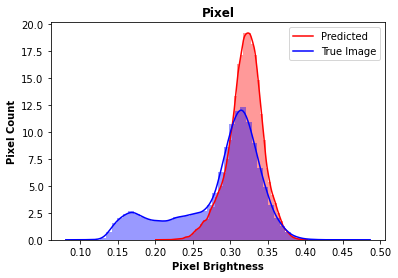

In [42]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

### Ti

In [43]:
x_train = ti.iloc[:,:int(ti.shape[1]/2)]
x_test = ti.iloc[:,int(ti.shape[1]/2):]
y_train = albedo_map.iloc[:,:int(albedo_map.shape[1]/2)]
y_test = albedo_map.iloc[:,int(albedo_map.shape[1]/2):]

In [44]:
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.0019408721516637713

#### Output predicted comparisions

In [46]:
column = []
for i in range(361,721):
    column.append(i)

In [47]:
y_pred = pd.DataFrame(y_pred, columns=column)
frames = [y_train, y_pred]
y_output = pd.concat(frames, axis = 1)

Text(0.5, 1.0, 'Output Image with predicted right half')

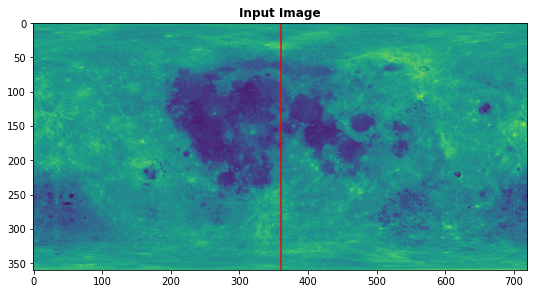

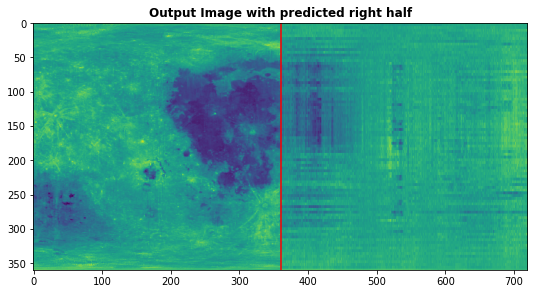

In [48]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(albedo_map_arr)
plt.axvline(x=360, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axvline(x=360, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted right half', fontweight="bold")

Histogram

In [49]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


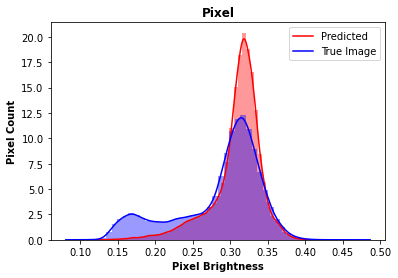

In [50]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

### Other Ratios

<font color = 'red'> Dividing data in other ratios for better results </font>

We are dividing for Fe dataset

#### Horizontal

In [51]:
x_train = fe.iloc[:int(fe.shape[0]/2),]
x_test = fe.iloc[int(fe.shape[0]/2):,]
y_train = albedo_map.iloc[:int(albedo_map.shape[0]/2),]
y_test = albedo_map.iloc[int(albedo_map.shape[0]/2):,]

In [52]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False, eta=0.1,
                                            eval_metric='rmse', gamma=None,
                                            gpu_id=None, importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=150, n_jobs=None,
                                            

In [53]:
y_pred = regressor.predict(x_test)

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.0028835320951995365

In [55]:
column = []
for i in range(1,721):
    column.append(i)

index = []
for i in range(180,360):
    index.append(i)

In [56]:
y_pred = pd.DataFrame(y_pred, columns=column, index = index)
y_train.columns = column
frames = [y_train,y_pred]
y_output = pd.concat(frames, axis = 0)

Text(0.5, 1.0, 'Output Image with predicted lower half')

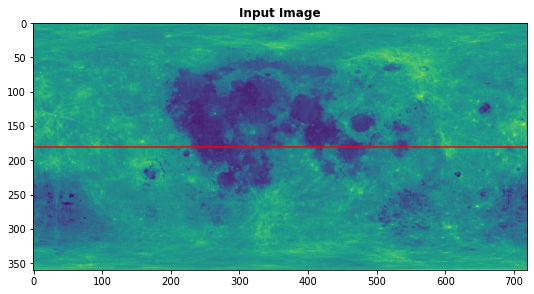

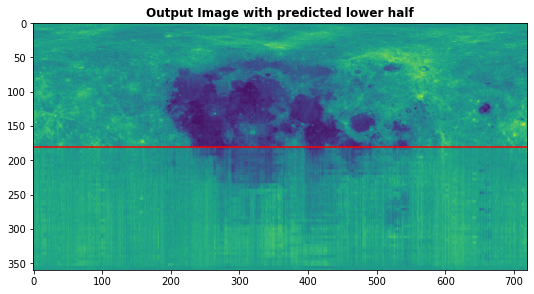

In [57]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(albedo_map_arr)
plt.axhline(y=180, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axhline(y=180, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted lower half', fontweight="bold")

Histogram

In [58]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


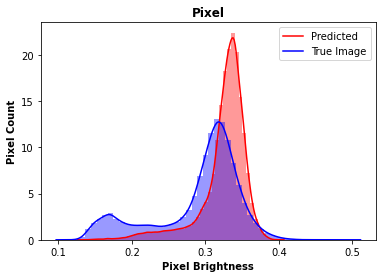

In [59]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

#### 80-20 Horizontal

In [116]:
x_train = fe.iloc[:288,]
x_test = fe.iloc[288:,]
y_train = albedo_map.iloc[:288,]
y_test = albedo_map.iloc[288:,]

In [117]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False, eta=0.1,
                                            eval_metric='rmse', gamma=None,
                                            gpu_id=None, importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=150, n_jobs=None,
                                            

In [118]:
y_pred = regressor.predict(x_test)

In [119]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.0009540594969898107

In [120]:
column = []
for i in range(1,721):
    column.append(i)

index = []
for i in range(288,360):
    index.append(i)

In [121]:
y_pred = pd.DataFrame(y_pred, columns=column, index = index)
y_train.columns = column
frames = [y_train,y_pred]
y_output = pd.concat(frames, axis = 0)

Text(0.5, 1.0, 'Output Image with predicted lower portion')

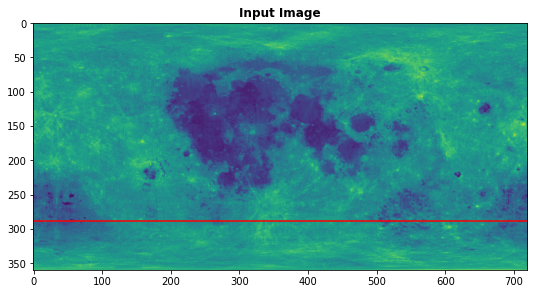

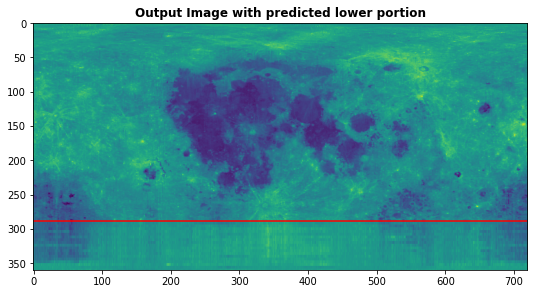

In [122]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(albedo_map_arr)
plt.axhline(y=288, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axhline(y=288, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted lower portion', fontweight="bold")

Histogram

In [123]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


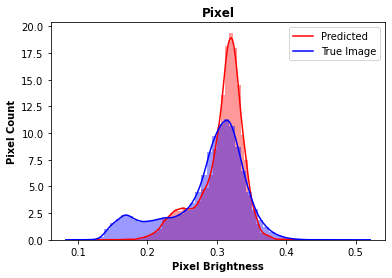

In [124]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

<font color = 'red'> Becuase the error observed was very less for 80-20 ratio lets plot other datasets for 80-20

## 80-20

### K

In [125]:
x_train = k.iloc[:288,]
x_test = k.iloc[288:,]
y_train = albedo_map.iloc[:288,]
y_test = albedo_map.iloc[288:,]

In [126]:
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [127]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.00184545332557657

#### Output predicted comparisions

In [128]:
column = []
for i in range(1,721):
    column.append(i)

index = []
for i in range(288,360):
    index.append(i)

In [129]:
y_pred = pd.DataFrame(y_pred, columns=column, index = index)
y_train.columns = column
frames = [y_train, y_pred]
y_output = pd.concat(frames, axis = 0)

Text(0.5, 1.0, 'Output Image with predicted lower portion')

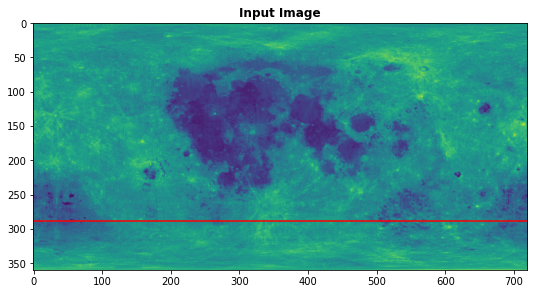

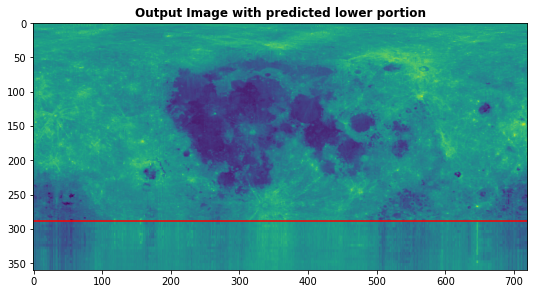

In [130]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(albedo_map_arr)
plt.axhline(y=288, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axhline(y=288, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted lower portion', fontweight="bold")

Histogram

In [131]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


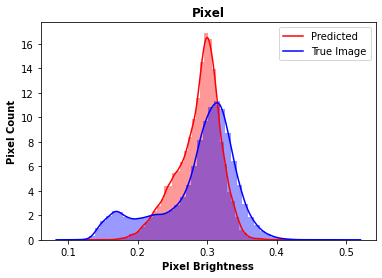

In [132]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

### Th

In [133]:
x_train = th.iloc[:288,]
x_test = th.iloc[288:,]
y_train = albedo_map.iloc[:288,]
y_test = albedo_map.iloc[288:,]

In [134]:
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [135]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.0015103615614187327

#### Output predicted comparisions

In [136]:
column = []
for i in range(1,721):
    column.append(i)

index = []
for i in range(288,360):
    index.append(i)

In [137]:
y_pred = pd.DataFrame(y_pred, columns=column, index = index)
y_train.columns = column
frames = [y_train, y_pred]
y_output = pd.concat(frames, axis = 0)

Text(0.5, 1.0, 'Output Image with predicted lower portion')

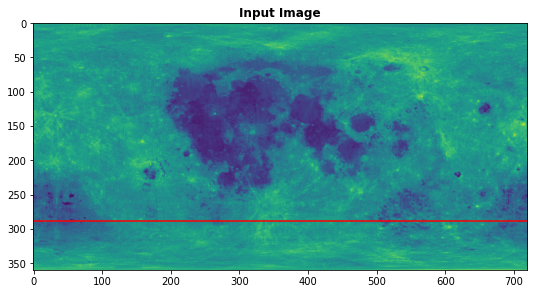

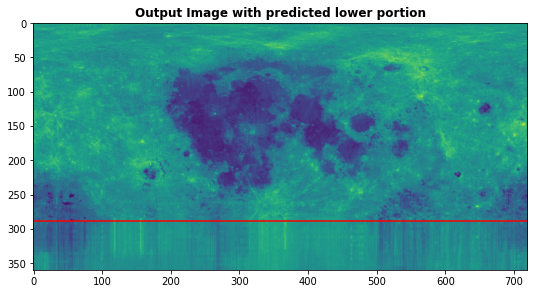

In [138]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(albedo_map_arr)
plt.axhline(y=288, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axhline(y=288, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted lower portion', fontweight="bold")

Histogram

In [139]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


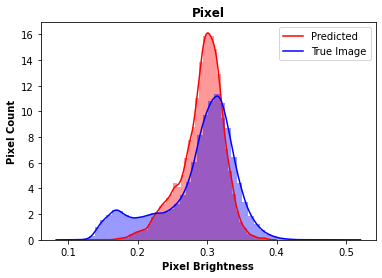

In [140]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])

### Ti

In [141]:
x_train = ti.iloc[:288,]
x_test = ti.iloc[288:,]
y_train = albedo_map.iloc[:288,]
y_test = albedo_map.iloc[288:,]

In [142]:
regressor = MultiOutputRegressor(XGBRegressor(objective = 'reg:squarederror',n_estimators=150, random_state = 0, eta = 0.1, subsample = 0.6, eval_metric = 'rmse'))
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [143]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.0008940511064421169

#### Output predicted comparisions

In [144]:
column = []
for i in range(1,721):
    column.append(i)

index = []
for i in range(288,360):
    index.append(i)

In [145]:
y_pred = pd.DataFrame(y_pred, columns=column, index = index)
y_train.columns = column
frames = [y_train, y_pred]
y_output = pd.concat(frames, axis = 0)

Text(0.5, 1.0, 'Output Image with predicted lower portion')

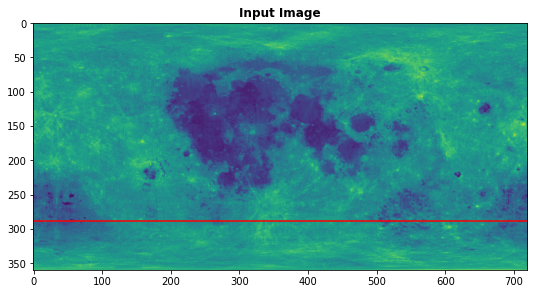

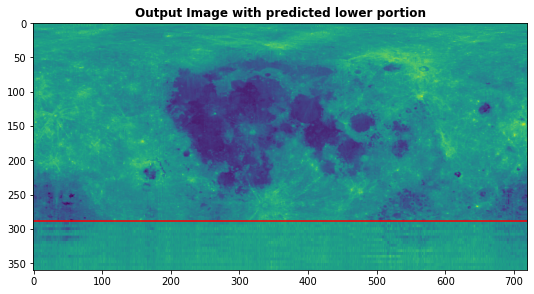

In [146]:
plt.figure(figsize =(10,10))
plt.subplot(2, 1, 1)
plt.imshow(albedo_map_arr)
plt.axhline(y=288, color='r')
plt.title('Input Image', fontweight="bold")

plt.figure(figsize =(10,10))
plt.subplot(2, 1, 2)
plt.axhline(y=288, color='r')
plt.imshow(y_output)
plt.title('Output Image with predicted lower portion', fontweight="bold")

Histogram

In [147]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


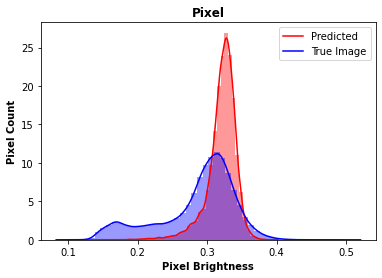

In [148]:
sns.distplot(y_pred, color= 'red')
sns.distplot(y_train, color = 'blue')
plt.title('Pixel', fontweight="bold")
plt.xlabel('Pixel Brightness', fontweight="bold")
plt.ylabel('Pixel Count', fontweight="bold")
plt.legend(['Predicted', 'True Image'])